Repeat the analysis in ModelledCharacteristics... but using all points in the Baltimore domain

In [221]:
# first import data 
#sshfs ascott47@jhu.edu@gateway2.marcc.jhu.edu:/scratch/groups/bzaitch1/badr/ mountpoint/
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import matplotlib.cm as cm
import scipy.spatial
import os 
import string
import scipy.stats

home_dir = os.getenv("HOME")

#source activate python2
from netCDF4 import Dataset
from wrf import getvar
import wrf
from wrf import ALL_TIMES
### plotting details 
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams['axes.color_cycle'] =['#d7191c','#fc8d59','#fee08b','#999999','#a6d96a','#1a9641','#3288bd']
matplotlib.rcParams['lines.linewidth'] = 3.0

lcc_english = {
    #! 40 CLASS MODIS (Outside US, cats 1-20)/NLCD (US only, cats 21-40) LU characterization
    # downloaded from https://github.com/yyr/wrf/blob/master/phys/module_sf_pxlsm_data.F March 8 2018
    1: 'Evergreen Needleleaf Forest',
    2:  'Evergreen Broadleaf Forest',
    3:  'Deciduous Needleleaf Forest',
    4:   'Deciduous Broadleaf Forest',
    5: 'Mixed Forest',
    6:  'Closed Shrublands', 
    7:'Open Shrublands', 
    8: 'Woody Savanna', 
    9:'Savanna', 
    10: 'Grasslands', 
    11: 'Perminent Wetlands', 
    12: 'Croplands',
    13: 'Urban andBuilt-up', 
    14: 'Cropland/Natural Vegetation Mosaic', 
    15: 'Snow and Ice', 
    16: 'Barren or Sparsely Vegetated', 
    17:  'IGBP water', 
    18: 'unclassified', 
    19: 'fill value (normally ocean water)', 
    20: 'unclassified', 
    21: 'Open water', 
    22: 'Perennial Ice/snow', 
    23: 'Developed, Open space', 
    24:'Developed, Low Intensity', 
    25: 'Developed, Medium Intensity', 
    26: 'Developed, High Intensity', 
    27: 'Barren land', 
    28: 'Deciduous Forest', 
    29: 'Evergreen Forest', 
    30: 'Mixed Forest',
    31: 'Dwarf Scrub', 
    32:  'Shrub/Scrub', 
    33: 'Grassland/Herbaceous', 
    34: 'Sedge/Herbaceous',
    35: 'Lichens', 
    36: 'Moss', 
    37: 'Pasture/Hay',
    38: 'Cultivated Crops',
    39: 'Woody Wetland',
    40: 'Emergent Herbaceous Wetland',
}
if ~ os.path.isdir('figures/whole_domain/'):
    !mkdir figures/whole_domain
fig_fpath = 'figures/whole_domain/'

mkdir: figures/whole_domain: File exists


In [2]:
filepath = '../cityheat/Bmore/2016/'
meta = pd.DataFrame(pd.read_csv(filepath + 'data/CleanedMeta2016.csv', sep = ','))
meta = meta.set_index('sensornumber', drop = False)
meta = meta.set_index(meta.index.astype('float64'), drop = False)
#mean_temp = pd.read_csv('meantemp.csv', header=-1).rename(columns = {0: 'SensorNumber', 1:'MeanTemp'}).set_index('SensorNumber')
# tempDF = pd.read_csv(filepath + 'data/CleanedTemp2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')#.first()
# tempDF.columns = tempDF.columns.astype('int')
# # remove data before the thermometer was installed
# for ind in tempDF.columns : 
#     start_hour = pd.to_datetime(meta.loc[ind,'time'][0:13] + ':00:00 UTC ' + meta.loc[ind,'time'][-4:])
#     tempDF.loc[:start_hour,ind] = np.nan
    
# start_date = '2016-07-01'
# end_date = '2016-08-30'
# tempDF = tempDF[start_date:end_date][meta['location:Longitude'].dropna().index].drop(41,axis=1)
# meta =meta.loc[tempDF.columns]
# remember to subtract bias

tempDF= pd.read_csv('data/correctedibuttontemp2016.csv', parse_dates = [0]).set_index('Date')
tempDF.columns = tempDF.columns.astype(int)

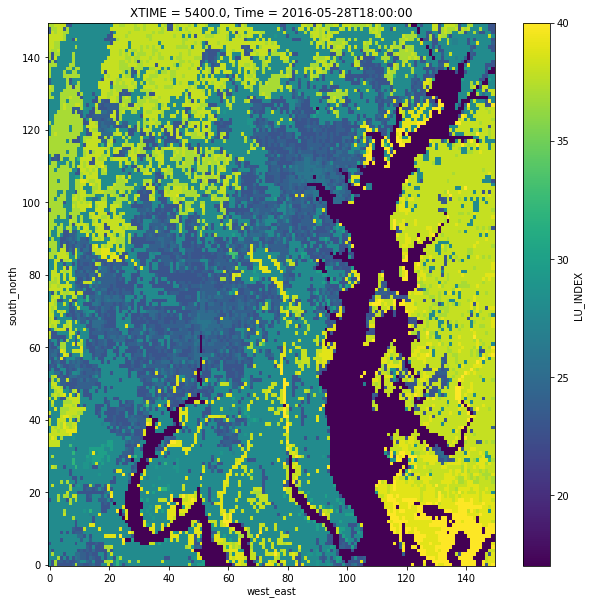

In [41]:
# define the domain of baltimore
exp = 'UCM+SST'
dom = 'd03'
fpath = home_dir + '/mountpoint/wrf/out/'
files = list(np.sort(glob.glob(fpath + '%s/%s/wrfout_d01*'%(exp,dom))))
ds = Dataset(files[30*3])
lu = getvar(ds, "LU_INDEX")
lu.plot(figsize = [10,10])

In [60]:
pts

<xarray.DataArray u'xy' (x_y: 2, idx: 2)>
array([[ 78,  92],
       [105, 129]])
Coordinates:
    latlon_coord  (idx) object CoordPair(lat=39.2551054, lon=-76.70629423) ...
  * x_y           (x_y) <U1 u'x' u'y'
Dimensions without coordinates: idx

In [207]:
pts[0][0]

<xarray.DataArray u'xy' ()>
array(78)
Coordinates:
    latlon_coord  object CoordPair(lat=39.2551054, lon=-76.70629423)
    x_y           <U1 u'x'

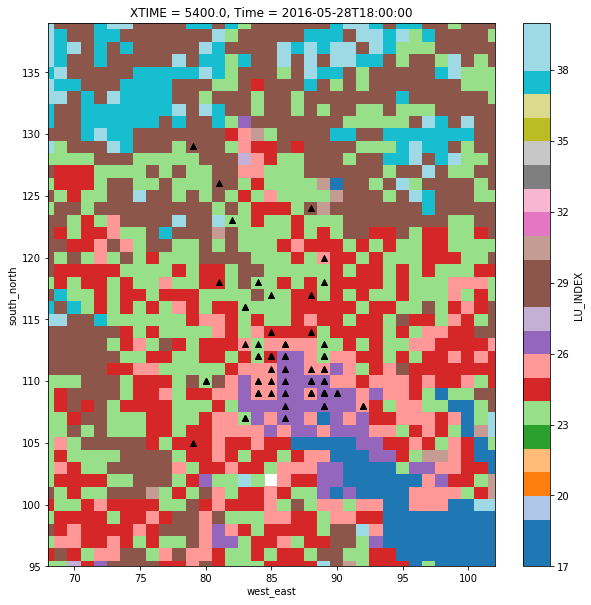

In [209]:
all_pts = wrf.ll_to_xy(ds, meta['location:Latitude'].dropna().values,
                       meta['location:Longitude'].dropna().values)
lu.plot(levels = 24, cmap  = cm.tab20, figsize = [10,10])
plt.scatter(all_pts[0], all_pts[1], marker = '^', color = 'k')
# plt.xlim(pts[0].values)
# plt.ylim(pts[1].values)
plt.xlim(pts[0][0]-10, pts[0][1]+10)
plt.ylim(pts[1][0]-10, pts[1][1]+10)
plt.savefig('figures/map.png')

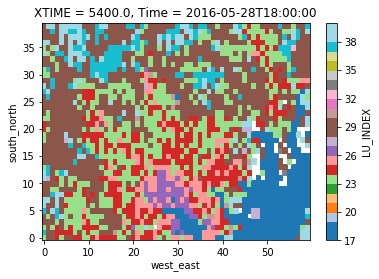

In [56]:
lu[100:140,60:120].plot(levels = 24, cmap  = cm.tab20)


In [142]:
lon = t2.XLONG[pts[1].min()-5:pts[1].max()+5,pts[0].min()-5:pts[0].max()+5].values.reshape(34*24)
lat = t2.XLAT[pts[1].min()-5:pts[1].max()+5,pts[0].min()-5:pts[0].max()+5].values.reshape(34*24)

In [ ]:
[:,pts[1].min()-5:pts[1].max()+5,pts[0].min()-5:pts[0].max()+5]

In [101]:
t2 = getvar(dataset_list[0:3], varname = "LU_INDEX", 
          timeidx = wrf.ALL_TIMES, 
          method = 'cat'
          )
# convert to degrees C
#t2 = t2 - 273.15
pts = wrf.ll_to_xy(dataset_list[0], [meta['location:Latitude'].min(), meta['location:Latitude'].max()],
                 [  meta['location:Longitude'].min(),   meta['location:Longitude'].max()])

all_data = t2[:,pts[1].min()-5:pts[1].max()+5,pts[0].min()-5:pts[0].max()+5]

In [102]:
all_data.shape

(3, 34, 24)

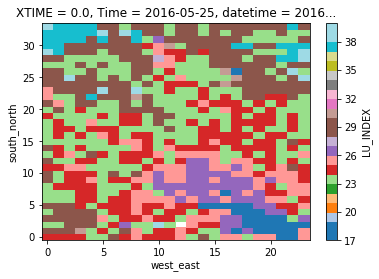

In [103]:
all_data[0,:,:].plot.pcolormesh(levels = 24, cmap  = cm.tab20)

In [74]:
meta['location:Longitude'].max()

-76.548337250000003

In [75]:
pts = wrf.ll_to_xy(dataset_list[0], [meta['location:Latitude'].min(), meta['location:Latitude'].max()],
                 [  meta['location:Longitude'].min(),   meta['location:Longitude'].max()])

In [76]:
pts

<xarray.DataArray u'xy' (x_y: 2, idx: 2)>
array([[ 78,  92],
       [105, 129]])
Coordinates:
    latlon_coord  (idx) object CoordPair(lat=39.2551054, lon=-76.70629423) ...
  * x_y           (x_y) <U1 u'x' u'y'
Dimensions without coordinates: idx

In [70]:
test = t2.isel(west_east = pts.values[0], south_north = pts.values[1])

In [84]:
pts[0].min().values

array(78)

In [87]:
test = t2[:,pts[0].min():pts[0].max(),pts[1].min():pts[1].max(),]# south_north
test.shape

(3, 14, 24)

In [105]:
34*24

816

In [104]:
all_data.shape

(3, 34, 24)

In [106]:
len(files)

2353

In [115]:
# run in python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import matplotlib.cm as cm
import scipy.spatial
import os 
import string
import scipy.stats

home_dir = os.getenv("HOME")

#source activate python2
from netCDF4 import Dataset
from wrf import getvar
import wrf
from wrf import ALL_TIMES

filepath = '../cityheat/Bmore/2016/'
meta = pd.DataFrame(pd.read_csv(filepath + 'data/CleanedMeta2016.csv', sep = ','))
meta = meta.set_index('sensornumber', drop = False)
meta = meta.set_index(meta.index.astype('float64'), drop = False)

exp = 'UCM+SST'
dom = 'd03'
fpath = home_dir + '/mountpoint/wrf/out/'
files = list(np.sort(glob.glob(fpath + '%s/%s/wrfout_d01*'%(exp,dom))))
analysis_points = meta[['location:Longitude', 'location:Latitude']].dropna()
nchunks = 20
df = pd.DataFrame(np.ones([len(files),34*24])*np.nan)
df.index = [file[-19:] for file in files]
n = 0
for i in range(nchunks):
    dataset_list = []
    for file in files[n:n+len(files)/nchunks]: 
        dataset_list.append(Dataset(file))
    pts = wrf.ll_to_xy(dataset_list[0], [meta['location:Latitude'].min(), meta['location:Latitude'].max()],
                 [  meta['location:Longitude'].min(), meta['location:Longitude'].max()])
    t2 = getvar(dataset_list, varname = "T2", 
              timeidx = wrf.ALL_TIMES, 
              method = 'cat'
              )
    # convert to degrees C
    t2 = t2 - 273.15
    #selected = 
    df.loc[files[n][-19:]:files[n+len(files)/nchunks-1][-19:],:] = t2[:,pts[1].min()-5:pts[1].max()+5,pts[0].min()-5:pts[0].max()+5].values.reshape([117, 34*24])
    #data = t2.isel(west_east = pts.values[0], south_north = pts.values[1])
    #df.loc[files[n][-19:]:files[n+len(files)/nchunks-1][-19:],:] = np.diagonal(t2.isel(west_east = pts.values[0], south_north = pts.values[1]), axis1=1,axis2=2)    #n= n+len(files)/nchunks
    for ds in dataset_list: 
        ds.close()
    t2.close()
    df.to_csv('%s_%s_wholedomain.csv'%(exp,dom))
    n = n+len(files)/nchunks

df.to_csv('data/%s_%s_wholedomain.csv'%(exp,dom))

In [ ]:
# pull bwi 
# run in python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import matplotlib.cm as cm
import scipy.spatial
import os 
import string
import scipy.stats

home_dir = os.getenv("HOME")

#source activate python2
from netCDF4 import Dataset
from wrf import getvar
import wrf
from wrf import ALL_TIMES

lat =  39.171359
lon = -76.662176

exp = 'UCM+SST'
dom = 'd03'
fpath = home_dir + '/mountpoint/wrf/out/'
files = list(np.sort(glob.glob(fpath + '%s/%s/wrfout_d01*'%(exp,dom))))
analysis_points = [lon, lat]#meta[['location:Longitude', 'location:Latitude']].dropna()
nchunks = 20
df = pd.DataFrame(np.ones([len(files),1])*np.nan)
df.index = [file[-19:] for file in files]
n = 0
for i in range(nchunks):
    dataset_list = [] 
    m = np.floor(len(files)/nchunks).astype(int)
    for file in files[n:n+m]: #files[n:n+len(files)/nchunks]: 
        dataset_list.append(Dataset(file))
    pts = wrf.ll_to_xy(dataset_list[0], lat,lon)
    t2 = getvar(dataset_list, varname = "T2", 
              timeidx = wrf.ALL_TIMES, 
              method = 'cat'
              )
    # convert to degrees C
    t2 = t2 - 273.15
    #selected = 
    df.loc[files[n][-19:]:files[n+m-1][-19:],0] = t2.isel(west_east = pts.values[0], south_north = pts.values[1])
    #data = t2.isel(west_east = pts.values[0], south_north = pts.values[1])
    #df.loc[files[n][-19:]:files[n+len(files)/nchunks-1][-19:],:] = np.diagonal(t2.isel(west_east = pts.values[0], south_north = pts.values[1]), axis1=1,axis2=2)    #n= n+len(files)/nchunks
    for ds in dataset_list: 
        ds.close()
    t2.close()
    df.to_csv(home_dir + '/blausteinmount/finalthesischapter/'+'data/%s_%s_bwi.csv'%(exp,dom))
    n = n+m#len(files)/nchunks

df.to_csv(home_dir + '/blausteinmount/finalthesischapter/'+'data/%s_%s_bwi.csv'%(exp,dom))

In [1]:
!pwd

/Users/ascott47/blausteinmount/finalthesischapter


In [116]:
lc = getvar(dataset_list[-1], "LU_INDEX")[pts[1].min()-5:pts[1].max()+5,pts[0].min()-5:pts[0].max()+5].values.reshape([34*24])#.isel(west_east = pts.values[0], south_north = pts.values[1])
lcc = pd.DataFrame(lc, columns=['LCC'])
lcc['LCC English'] =  [lcc_english[int(x)]for x in lcc.LCC]
lcc.to_csv('data/%s_%s_landcover_wholedomain.csv'%(exp,dom))

In [119]:
vf = getvar(dataset_list[-1], 'VEGFRA')[pts[1].min()-5:pts[1].max()+5,pts[0].min()-5:pts[0].max()+5].values.reshape([34*24])#.isel(west_east = pts.values[0], south_north = pts.values[1])
vff = pd.DataFrame(vf, columns=['VF'])
vff.to_csv('data/%s_%s_vf_wholedomain.csv'%(exp,dom))

In [115]:
lcc_english = {
    #! 40 CLASS MODIS (Outside US, cats 1-20)/NLCD (US only, cats 21-40) LU characterization
    # downloaded from https://github.com/yyr/wrf/blob/master/phys/module_sf_pxlsm_data.F March 8 2018
    1: 'Evergreen Needleleaf Forest',
    2:  'Evergreen Broadleaf Forest',
    3:  'Deciduous Needleleaf Forest',
    4:   'Deciduous Broadleaf Forest',
    5: 'Mixed Forest',
    6:  'Closed Shrublands', 
    7:'Open Shrublands', 
    8: 'Woody Savanna', 
    9:'Savanna', 
    10: 'Grasslands', 
    11: 'Perminent Wetlands', 
    12: 'Croplands',
    13: 'Urban andBuilt-up', 
    14: 'Cropland/Natural Vegetation Mosaic', 
    15: 'Snow and Ice', 
    16: 'Barren or Sparsely Vegetated', 
    17:  'IGBP water', 
    18: 'unclassified', 
    19: 'fill value (normally ocean water)', 
    20: 'unclassified', 
    21: 'Open water', 
    22: 'Perennial Ice/snow', 
    23: 'Developed, Open space', 
    24:'Developed, Low Intensity', 
    25: 'Developed, Medium Intensity', 
    26: 'Developed, High Intensity', 
    27: 'Barren land', 
    28: 'Deciduous Forest', 
    29: 'Evergreen Forest', 
    30: 'Mixed Forest',
    31: 'Dwarf Scrub', 
    32:  'Shrub/Scrub', 
    33: 'Grassland/Herbaceous', 
    34: 'Sedge/Herbaceous',
    35: 'Lichens', 
    36: 'Moss', 
    37: 'Pasture/Hay',
    38: 'Cultivated Crops',
    39: 'Woody Wetland',
    40: 'Emergent Herbaceous Wetland',
}

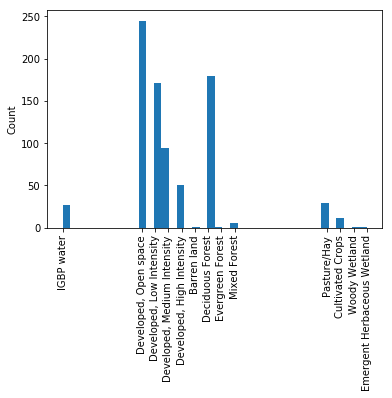

In [123]:
patches = plt.hist(lcc.LCC.values, bins = 40)
markers = plt.xticks(lcc.LCC.unique(),
                     [lcc_english[int(x)]for x in lcc.LCC.unique()], rotation='vertical')
plt.ylabel('Count')

In [127]:
date_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d_%H:%M:%S') -pd.Timedelta('4h')
model = pd.read_csv('data/UCM+SST_d03_wholedomain.csv',parse_dates=['Unnamed: 0'],date_parser=date_parser).set_index('Unnamed: 0')[tempDF.index[0]:tempDF.index[-1]]
model.columns = model.columns.astype(int)

# Diurnal cycle 

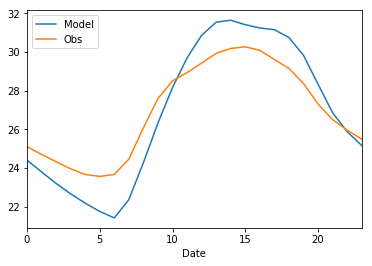

In [128]:
model.groupby(model.index.hour).mean().mean(axis=1).plot()
tempDF.groupby(tempDF.index.hour).mean().mean(axis=1).plot()
plt.legend(['Model', 'Obs'],loc=2)

In [217]:
lcc.LCC.unique()

array([ 24.,  23.,  28.,  25.,  17.,  30.,  26.,  39.,  40.,  29.,  37.,
        38.,  27.])

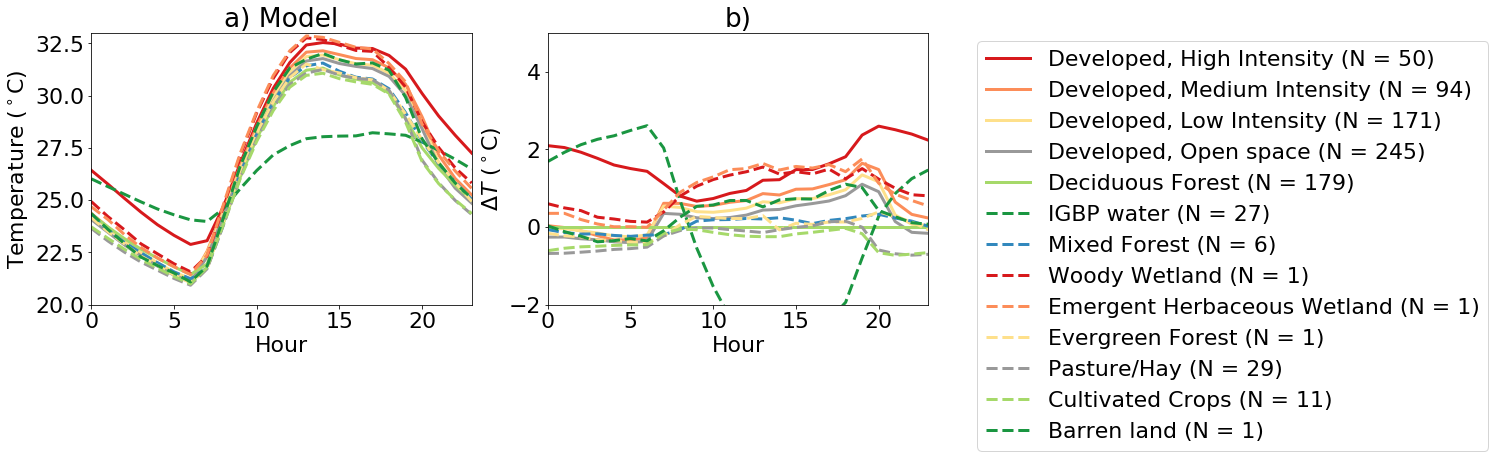

In [223]:
plt.figure(figsize = [15,5])
model_urban =  model[lcc[lcc.LCC ==26].index].groupby(model.index.hour).mean().mean(axis=1)
model_rural =  model[lcc[lcc.LCC ==28].index].groupby(model.index.hour).mean().mean(axis=1)

lccs = [ 26, 25, 24.,  23.,  28.,  17.,  30., 39.,  40.,  29.,  37., 38.,  27.]
original_lccs = [26,25,24,23, 28]
#plot temp
ax = plt.subplot(1,2,1)
for lc in lccs: #lcc.LCC.unique():
    if lc in original_lccs: 
        s = '-'
    else: 
        s = '--'
    model[lcc[lcc.LCC ==lc].index].groupby(model.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1],ax=ax, style = s)
ax.set_title('a) Model')
ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_xlabel('Hour')
#plt.legend()
ax.set_ylim([20,33])

# plot DT
ax = plt.subplot(1,2,2)
for lc in lccs: #lcc.LCC.unique():
#     model_urban.subtract(model[lcc[lcc.LCC ==lc].index].groupby(model.index.hour).mean().mean(axis=1)).plot(label = lcc_english[lc],ax=ax)
    if lc in original_lccs: 
        s = '-'
    else: 
        s = '--'
    (model[lcc[lcc.LCC ==lc].index].groupby(model.index.hour).mean().mean(axis=1)).subtract(model_rural).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1],ax=ax, style =s)
ax.set_title('b)')
ax.set_ylabel('$\Delta T$ ($^\circ$C)')
ax.set_xlabel('Hour')
#plt.legend()
ax.set_ylim([-2,5])

plt.legend(bbox_to_anchor=(1.1, 1.01))

plt.savefig(fig_fpath + 'diurnal_model.eps', bbox_inches='tight')

# UHI intensity as a function of distance from the city center
# Variability within city
The semi-variance provides a measure of spatial variance as a function of distance; it indicates an average difference between two data points $f(a), f(a+h)$ given their distance apart $h$: 
$$ s(h) = \frac{1}{2 N(h)} \sum _{N(h)} \left(f(a+h) -f(a)\right)^2 $$
Here, we calculate the experimental semi-variance by making $h$ a discrete variable equal to fixed-width distances. 

In [143]:
lon = t2.XLONG[pts[1].min()-5:pts[1].max()+5,pts[0].min()-5:pts[0].max()+5].values.reshape(34*24)
lat = t2.XLAT[pts[1].min()-5:pts[1].max()+5,pts[0].min()-5:pts[0].max()+5].values.reshape(34*24)

In [149]:
locations = np.array([lon,lat]).T
data = model.mean().values
N = data.shape[0]
hs = np.linspace(0,25,26)
bandwidth =1# np.abs(hs[1]-hs[0])
semivariogram = pd.DataFrame(index = hs, columns= ['semivariogram'])
for h in hs:
    Z = []
    for i in range(N): 
        for j in range(i+1,N): 
            #distances[i,j] = scipy.spatial.distance.euclidean(locations[i,:], locations[j,:])/360*2*np.pi*r_earth
            distance = scipy.spatial.distance.euclidean(locations[i,:], locations[j,:])/360*2*np.pi*r_earth
            if (distance >= h) and (distance< h+bandwidth):
                Z.append(np.abs(data[i] - data[j])) 
    semivariogram.loc[h, 'semivariogram']= np.sum(Z)/(2.0*len(Z))


/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in double_scalars


In [155]:
locations.shape

(816, 2)

/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in double_scalars


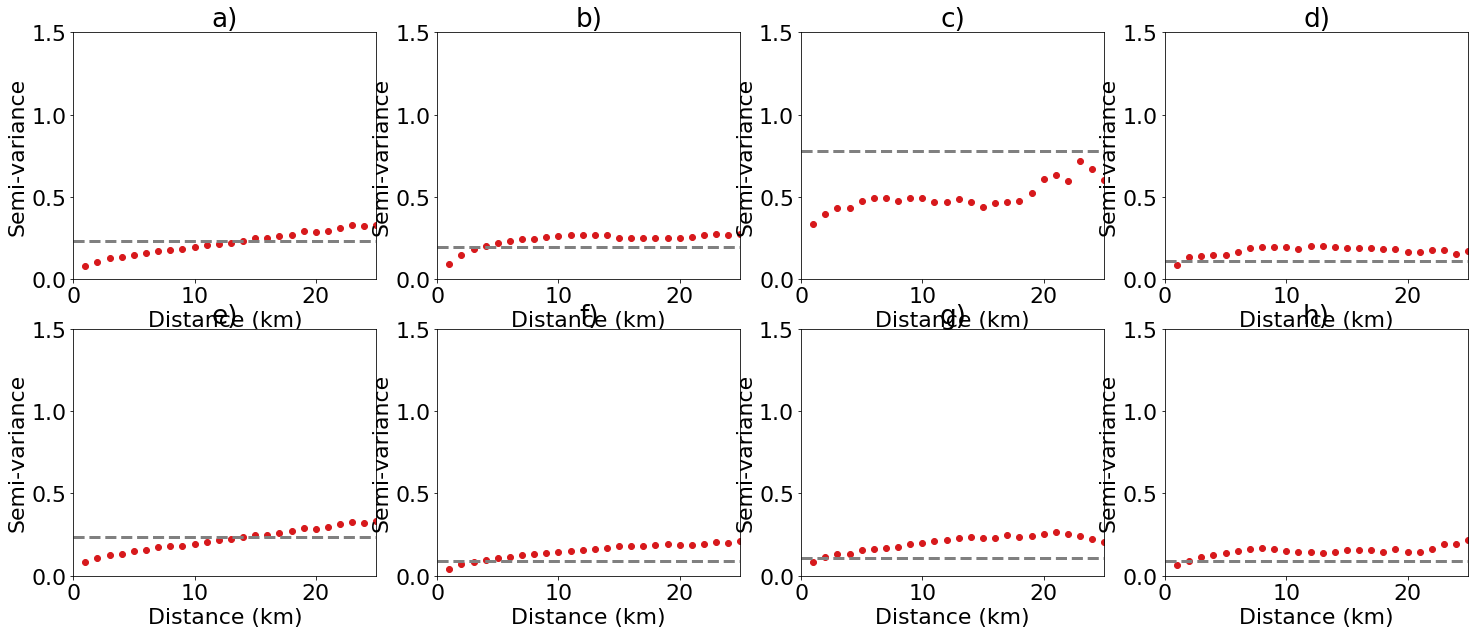

In [255]:
r_earth = 6371

labels = ['All Data', 'Developed, Open space + Developed, Low Intensity',
 'Developed, Medium + High Intensity',
# 'Developed, High Intensity',
 'Deciduous Forest']
fig =plt.figure(figsize=[25,10])
iii = 1
for hr in [6,16]: 
    locations0 = np.array([lon,lat]).T
    data0 = model.mean().values
    
    locations1 = locations0[lcc[(lcc.LCC>=23) & (lcc.LCC <=24)].index]#pts_df.loc[lcc[(lcc.LCC>=23) & (lcc.LCC <=24)].index].values
    data1 =  model[model.index.hour==hr][lcc[(lcc.LCC>=23) & (lcc.LCC <=24)].index].mean().values
    
    locations3 =locations0[lcc[(lcc.LCC>=25) & (lcc.LCC <=26)].index]
    data3 =  model[model.index.hour==hr][lcc[(lcc.LCC>=25) & (lcc.LCC <=26)].index].mean().values
    
    locations5 = locations0[lcc[lcc.LCC ==28].index]
    data5 =  model[model.index.hour==hr][lcc[lcc.LCC ==28].index].mean().values
    
    hs = np.linspace(0,25,26)
    bandwidth =1# np.abs(hs[1]-hs[0])


    for data,locations,label in zip([data0,data1, data3, data5], [locations0,locations1,locations3,locations5], labels):
        N = data.shape[0]
        ax = plt.subplot(2,4,iii)
        semivariogram = pd.DataFrame(index = hs, columns= ['semivariogram'])
        for h in hs:
            Z = []
            for i in range(N): 
                for j in range(i+1,N): 
                    #distances[i,j] = scipy.spatial.distance.euclidean(locations[i,:], locations[j,:])/360*2*np.pi*r_earth
                    distance = scipy.spatial.distance.euclidean(locations[i,:], locations[j,:])/360*2*np.pi*r_earth
                    if (distance >= h) and (distance< h+bandwidth):
                        Z.append(np.abs(data[i] - data[j])) 
            semivariogram.loc[h, 'semivariogram']= np.sum(Z)/(2.0*len(Z))
        ax.scatter(semivariogram.index, semivariogram.semivariogram)
        ax.axhline(data.var(), linestyle ='--', color = 'gray')
        ax.set_title('%s)'%(string.ascii_lowercase[iii-1]))
#        ax.set_title('%s , %i o\'clock '%(label,hr))
        ax.set_xlabel('Distance (km)')
        ax.set_ylabel('Semi-variance')
        ax.set_ylim([0,1.5])
        ax.set_xlim([0,25])

        iii = iii+1
plt.savefig(fig_fpath+'spatialvariability_model.eps', bbox_inches = 'tight')

# Variability by landcover type


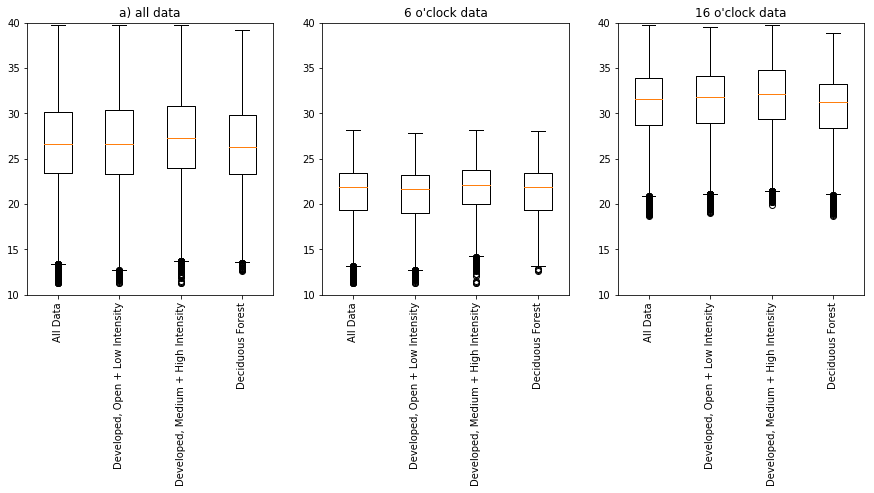

In [161]:
fig = plt.figure(figsize=[15,5])
ax = plt.subplot(1,3,1)
# data = [model.mean().dropna().values.flatten(), # all data
#         model[lcc[(lcc.LCC>=23) & (lcc.LCC <=24)].index].mean().values.flatten(),  #
#         model[lcc[(lcc.LCC>=25) & (lcc.LCC <=26)].index].mean().values.flatten(), 
#         model[lcc[lcc.LCC ==28].index].mean().values.flatten()
#        ]
data = [model.dropna().values.flatten(), # all data
        model[lcc[(lcc.LCC>=23) & (lcc.LCC <=24)].index].dropna().values.flatten(),  #
        model[lcc[(lcc.LCC>=25) & (lcc.LCC <=26)].index].dropna().values.flatten(), 
        model[lcc[lcc.LCC ==28].index].dropna().values.flatten(),
       ]
labels = ['All Data', 'Developed, Open + Low Intensity',
 'Developed, Medium + High Intensity', 'Deciduous Forest']
handles = plt.boxplot(data,positions=[0,1,2,3])
labels = ax.set_xticklabels(labels, rotation='vertical')
ax.set_title('a) all data')
ax.set_ylim([10,40])
iii = 2
for hr in [6,16]: 
    ax = plt.subplot(1,3,iii)
#     data = [model[model.index.hour == hr].mean().dropna().values.flatten(), # all data
#         model[model.index.hour == hr][lcc[(lcc.LCC>=23) & (lcc.LCC <=24)].index].mean().values.flatten(),  #
#         model[model.index.hour == hr][lcc[(lcc.LCC>=25) & (lcc.LCC <=26)].index].mean().values.flatten(), 
#         model[model.index.hour == hr][lcc[lcc.LCC ==28].index].mean().values.flatten()
#        ]
    data = [model[model.index.hour == hr].dropna().values.flatten(), # all data
        model[model.index.hour == hr][lcc[(lcc.LCC>=23) & (lcc.LCC <=24)].index].dropna().values.flatten(),  #
        model[model.index.hour == hr][lcc[(lcc.LCC>=25) & (lcc.LCC <=26)].index].dropna().values.flatten(), 
        model[model.index.hour == hr][lcc[lcc.LCC ==28].index].dropna().values.flatten(),
       ]
    
    handles = plt.boxplot(data,positions=[0,1,2,3])
    labels = ax.set_xticklabels(labels,rotation='vertical')
    ax.set_title('%s o\'clock data'%hr)
    ax.set_ylim([10,40])
    iii =iii+1
plt.savefig(fig_fpath+'landcover_boxplots_model.png')

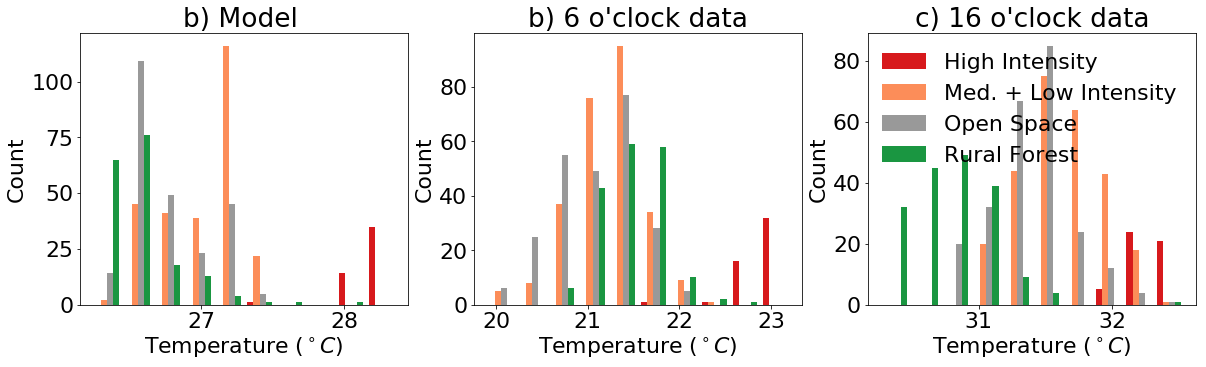

In [245]:
# fig = plt.figure(figsize=[15,5])
# ax = plt.subplot(1,3,1)
# data = [model.dropna().mean().values.flatten(), # all data
#         model[lcc[(lcc.LCC>=23) & (lcc.LCC <=24)].index].mean(),#.dropna().values.flatten(),  #
#         model[lcc[(lcc.LCC>=25) & (lcc.LCC <=26)].index].mean(),#.dropna().values.flatten(), 
#         model[lcc[lcc.LCC ==28].index].mean(),#.dropna().values.flatten(),
#        ]
# labels = ['All Data', 'Developed, Open + Low Intensity','Developed, Medium + High Intensity', 
#           'Deciduous Forest']
# ax.hist(data)
# ax.set_xlabel('Temperature ($^\circ C$)')
# ax.set_ylabel('Count')
# ax.set_title('a) All Data')
# plt.legend(labels)

# iii = 2
# for hr in [6,16]: 
#     ax = plt.subplot(1,3,iii)
#     data = [model[model.index.hour == hr].mean(), # all data
#         model[model.index.hour == hr][lcc[(lcc.LCC>=23) & (lcc.LCC <=24)].index].mean(),  #
#         model[model.index.hour == hr][lcc[(lcc.LCC>=25) & (lcc.LCC <=26)].index].mean(), 
#         model[model.index.hour == hr][lcc[lcc.LCC ==28].index].mean(),
#        ]
#     ax.hist(data)
#     #handles = plt.boxplot(data,positions=[0,1,2,3])
#     #labels = ax.set_xticklabels(labels,rotation='vertical')
#     ax.set_title('b) %s o\'clock data'%hr)
#     #ax.set_ylim([10,40])
#     ax.set_xlabel('Temperature ($^\circ C$)')
#     ax.set_ylabel('Count')
#     iii =iii+1

# remove yellow from cmap
matplotlib.rcParams['axes.color_cycle'] =['#d7191c','#fc8d59','#999999','#1a9641', '#a6d96a','#3288bd']

# Histogram of temperature by lancover type
fig = plt.figure(figsize=[20,5])
labels = ['Developed, High Intensity' ,'Developed, Med. + Low Intensity', 'Developed, Open Space', 'Deciduous Forest']

ax = plt.subplot(1,3,1)
data = [#tempDF.dropna().mean().values.flatten(), # all data
        model.dropna()[lcc[(lcc.LCC==26)].index].mean(),
        model.dropna()[lcc[(lcc.LCC>=24) & (lcc.LCC <=25)].index].mean(),#.dropna().values.flatten(),  #
        model.dropna()[lcc[(lcc.LCC==23)].index].mean(),#.dropna().values.flatten(), 
        model.dropna()[lcc[lcc.LCC ==28].index].mean(),#.dropna().values.flatten(),
       ]
ax.hist(data)
ax.set_xlabel('Temperature ($^\circ C$)')
ax.set_ylabel('Count')
ax.set_title('b) Model ')
#plt.legend(labels)
iii = 2
for hr in [6,16]: 
    ax = plt.subplot(1,3,iii)

    data = [#tempDF.dropna().mean().values.flatten(), # all data
        model[model.index.hour ==hr][lcc[(lcc.LCC==26)].index].mean(),
        model[model.index.hour ==hr][lcc[(lcc.LCC>=24) & (lcc.LCC <=25)].index].mean(),#.dropna().values.flatten(),  #
        model[model.index.hour ==hr][lcc[(lcc.LCC==23)].index].mean(),#.dropna().values.flatten(), 
        model[model.index.hour ==hr][lcc[lcc.LCC ==28].index].mean(),#.dropna().values.flatten(),
       ]
    ax.hist(data)
    ax.set_title('%s) %s o\'clock data'%(string.ascii_lowercase[iii-1],hr))
    ax.set_xlabel('Temperature ($^\circ C$)')
    ax.set_ylabel('Count')
    iii =iii+1    
plt.subplots_adjust(hspace=.5)
labels = ['High Intensity' ,'Med. + Low Intensity', 'Open Space', 'Rural Forest']
plt.legend(labels,frameon=False)
plt.savefig(fig_fpath+'landcover_distribution.eps', bbox_inches='tight')

In [165]:
def easy_scatter(x,y,title='', xlabel='', ylabel='') : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r, p = scipy.stats.pearsonr(x[ind], y[ind]) #np.corrcoef(x[ind],y[ind])[0,1]
    plt.scatter(x,y, color = 'grey')
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r = %.2f'%(r), xy=(.5, .85), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p = %.2f'%(p), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('N = %i'%(ind[ind].shape), xy=(.5, .75), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, r, p

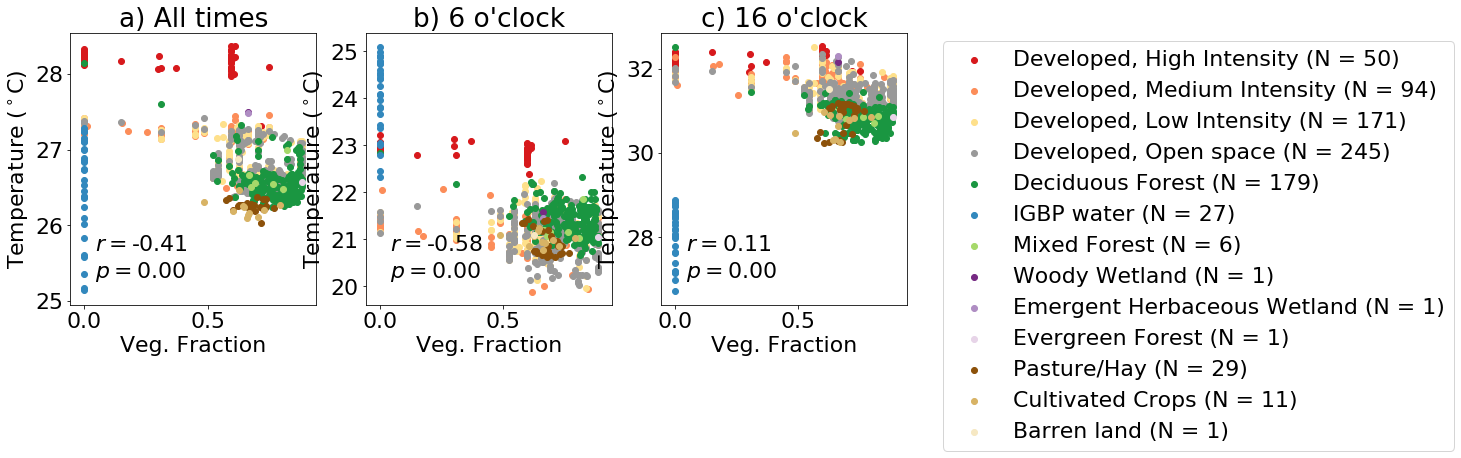

In [254]:
matplotlib.rcParams['axes.color_cycle'] =['#d7191c','#fc8d59','#fee08b','#999999','#1a9641','#3288bd','#a6d96a','#762a83','#af8dc3','#e7d4e8','#8c510a','#d8b365','#f6e8c3','#c7eae5', ]
lccs = [ 26, 25, 24.,  23.,  28.,  17.,  30., 39.,  40.,  29.,  37., 38.,  27.]

fig = plt.figure(figsize=[15,5])
ax = plt.subplot(1,3,1)
#easy_scatter(vff.values.flatten()*.01, model.mean().values)
# code by color for landcover type
for lc_type in lccs: # lcc.LCC.unique() : 
    plt.scatter(vff.loc[lcc[ lcc.LCC==lc_type].index]*.01,model.mean().loc[lcc[ lcc.LCC==lc_type].index])
r,p = scipy.stats.pearsonr(model.mean(),vff.values.flatten()*.01)
ax.annotate('$r=$%2.2f'%r, xy=(.1, .2), xycoords ='axes fraction')
ax.annotate('$p=$%2.2f'%p, xy=(.1, .1), xycoords ='axes fraction')
ax.set_xlabel('Veg. Fraction')
ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_title('a) All times')
iii = 2
for hr in [6,16]: 
    ax = plt.subplot(1,3,iii)
    x = vff.values.flatten()*.01
    y = model[model.index.hour== hr].mean().values
    #y = y[x.index]
    #easy_scatter(x,y)
    for lc_type in lccs: # lcc.LCC.unique() : 
        plt.scatter(vff.loc[lcc[ lcc.LCC==lc_type].index]*.01,
                    model[model.index.hour== hr].mean().loc[lcc[ lcc.LCC==lc_type].index], label = lcc_english[lc_type] + ' (N = %i)'%model[lcc[lcc.LCC ==lc_type].index].shape[1],)
    #ax.scatter(x,y)
    r, p = scipy.stats.pearsonr(x,y)
    ax.annotate('$r=$%2.2f'%r, xy=(.1, .2), xycoords ='axes fraction')
    ax.annotate('$p=$%2.2f'%p, xy=(.1, .1), xycoords ='axes fraction')
    ax.set_xlabel('Veg. Fraction')
    ax.set_ylabel('Temperature ($^\circ$C)')
    ax.set_title('%s) %s o\'clock'%(string.ascii_lowercase[iii-1],hr))
    iii = iii+1
# plt.legend(['Developed, Open space', 'Developed, Medium Intensity',
#        'Deciduous Forest', 'Developed, High Intensity',
#        'Developed, Low Intensity'])
plt.legend( bbox_to_anchor=(1.1, 1.01))
#plt.legend([lcc_english[x] for x in lcc.LCC.unique()], bbox_to_anchor=(1.1, 1.01))
plt.savefig(fig_fpath+'landcover_model.eps', bbox_inches = 'tight')

# Surface energy budget by landcover type

In [172]:
model.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            806, 807, 808, 809, 810, 811, 812, 813, 814, 815],
           dtype='int64', length=816)

In [183]:
variables = ['LWDNB', 'LWUPB', 'SWDNB', 'SWUPB', 'LH', 'HFX', 'GRDFLX',]

col_iterables = [variables,model.columns]
df = pd.DataFrame(columns=pd.MultiIndex.from_product(col_iterables, names = ['Variable', 'iButtonID']), 
    index = [file[-19:] for file in files])
idx = pd.IndexSlice

In [184]:
var = 'LH'
df.loc[files[n][-19:]:files[n+len(files)/nchunks-1][-19:],var] 

iButtonID,0,1,2,3,4,5,6,7,8,9,...,806,807,808,809,810,811,812,813,814,815
2016-05-25_00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-25_01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-25_02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-25_03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-25_04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-25_05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-25_06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-25_07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-25_08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-25_09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# read in data for : 
variables = ['LWDNB', 'LWUPB', 'SWDNB', 'SWUPB', 'LH', 'HFX', 'GRDFLX',]

# run in python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import matplotlib.cm as cm
import scipy.spatial
import os 
import string
import scipy.stats

home_dir = os.getenv("HOME")

#source activate python2
from netCDF4 import Dataset
from wrf import getvar
import wrf
from wrf import ALL_TIMES

filepath = '../cityheat/Bmore/2016/'
meta = pd.DataFrame(pd.read_csv(filepath + 'data/CleanedMeta2016.csv', sep = ','))
meta = meta.set_index('sensornumber', drop = False)
meta = meta.set_index(meta.index.astype('float64'), drop = False)

exp = 'UCM+SST'
dom = 'd03'
fpath = home_dir + '/mountpoint/wrf/out/'
files = list(np.sort(glob.glob(fpath + '%s/%s/wrfout_d01*'%(exp,dom))))
#analysis_points = meta[['location:Longitude', 'location:Latitude']].dropna()
nchunks = 20

variables = ['LWDNB', 'LWUPB', 'SWDNB', 'SWUPB', 'LH', 'HFX', 'GRDFLX',]

col_iterables = [variables,model.columns]
df = pd.DataFrame(columns=pd.MultiIndex.from_product(col_iterables, names = ['Variable', 'iButtonID']), 
    index = [file[-19:] for file in files])
idx = pd.IndexSlice
n = 0
for i in range(nchunks):
    dataset_list = []
    for file in files[n:n+len(files)/nchunks]: 
        dataset_list.append(Dataset(file))
    pts = wrf.ll_to_xy(dataset_list[0], [meta['location:Latitude'].min(), meta['location:Latitude'].max()],
                 [  meta['location:Longitude'].min(), meta['location:Longitude'].max()])
    for var in variables: 
        t2 = getvar(dataset_list, varname = var,# "T2", 
                  timeidx = wrf.ALL_TIMES, 
                  method = 'cat'
                  )
        if len(t2.shape) ==3: 
            df.loc[files[n][-19:]:files[n+len(files)/nchunks-1][-19:],var] = t2[:,pts[1].min()-5:pts[1].max()+5,pts[0].min()-5:pts[0].max()+5].values.reshape([117, 34*24])
        else: 
            print('Skipping %s'%var)
    for ds in dataset_list: 
        ds.close()
    t2.close()
    df.to_csv('data/%s_%s_wholedomain_SEBvars.csv'%(exp,dom))
    n = n+len(files)/nchunks

df.to_csv('data/%s_%s_wholedomain_SEBvars.csv'%(exp,dom))

In [185]:
ls data/UCM+SST_d03_wholedomain*

data/UCM+SST_d03_wholedomain.csv
data/UCM+SST_d03_wholedomain_SEBvars.csv


In [203]:
date_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d_%H:%M:%S') -pd.Timedelta('4h')
model_allvars = pd.read_csv('data/UCM+SST_d03_wholedomain_SEBvars.csv',header = [0,1], index_col=0,
                        parse_dates = [0], 
                   date_parser = date_parser,
                       skipinitialspace=True)#[tempDF.index[0]:tempDF.index[-1]]
model_allvars.columns.set_levels(model_allvars.columns.levels[1].astype(int), level = 1, inplace = True)
model_allvars = model_allvars['2016-07-01':'2016-08-30']
net_lw = model_allvars['LWDNB'].subtract(model_allvars['LWUPB'])
net_sw = (model_allvars['SWDNB'].subtract(model_allvars['SWUPB']))#.add(model_allvars['net_lw'],axis=0)
rnet = net_lw+net_sw

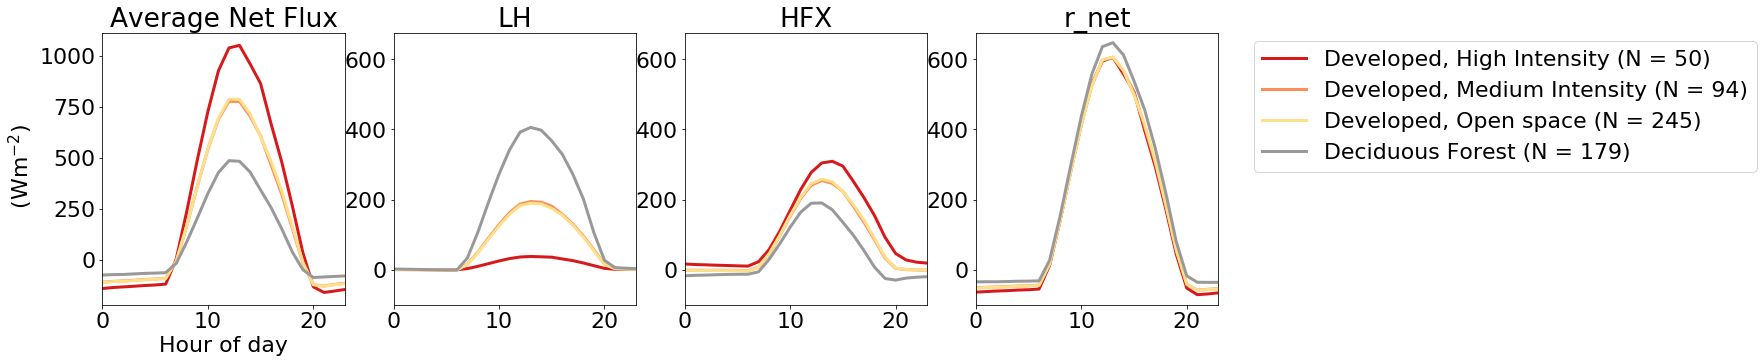

In [263]:
# SEB plots
#em = getvar(dataset_list[-1], 'EMISS')

plt.figure(figsize = [20,5])
ax = plt.subplot(1, 4,1)
netflux = rnet -  model_allvars.loc[:,'LH']+ model_allvars.loc[:,'HFX'] -  model_allvars.loc[:,'GRDFLX']
for lc in [ 26.,25,23,  28.]:
    if lc == 25: 
        netflux[lcc[(lcc.LCC <= 25) & (lcc.LCC >=24)].index].groupby(netflux.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1]) 
    else: 
        netflux[lcc[lcc.LCC==lc].index].groupby(netflux.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1]) 
#plt.legend(labels, bbox_to_anchor=(1.1, 1.01))
plt.title('Average Net Flux')
plt.xlabel('Hour of day')
plt.ylabel(' (Wm$^{-2}$)')
# want: 'R_net', 'Net LW','Sensible', 'Latent', 'Ground flux',
#selected_vars = ['GRDFLX','LH','HFX' ]
selected_vars = ['LH','HFX' ]
#['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX','CLDFRA', 'QVAPOR',]
#plt.figure(figsize=[20,5])
i = 2
for var in selected_vars:
    ax = plt.subplot(1, 4,i)
    data = model_allvars.loc[:,var]
    for lc in [ 26.,25,23,  28.]:
        if lc == 25: 
            data[lcc[(lcc.LCC <= 25) & (lcc.LCC >=24)].index].groupby(data.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1]) 
        else: 
            data[lcc[lcc.LCC==lc].index].groupby(data.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1]) 
    ax.set_title(var)
    ax.set_ylim([-100,675])
    i = i+1
    
ax = plt.subplot(1, 4,i)
data = model_allvars.loc[:,var]
for lc in [ 26.,25,23,  28.]:
    if lc == 25 : 
        rnet[lcc[(lcc.LCC <= 25) & (lcc.LCC >=24)].index].groupby(data.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1],ax=ax)
    else : 
        rnet[lcc[lcc.LCC==lc].index].groupby(data.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1],ax=ax)
ax.set_title('r_net')
ax.set_ylim([-100,675])
plt.legend(bbox_to_anchor=(1.1, 1.01))
plt.savefig(fig_fpath+'SEB.eps', bbox_inches = 'tight')

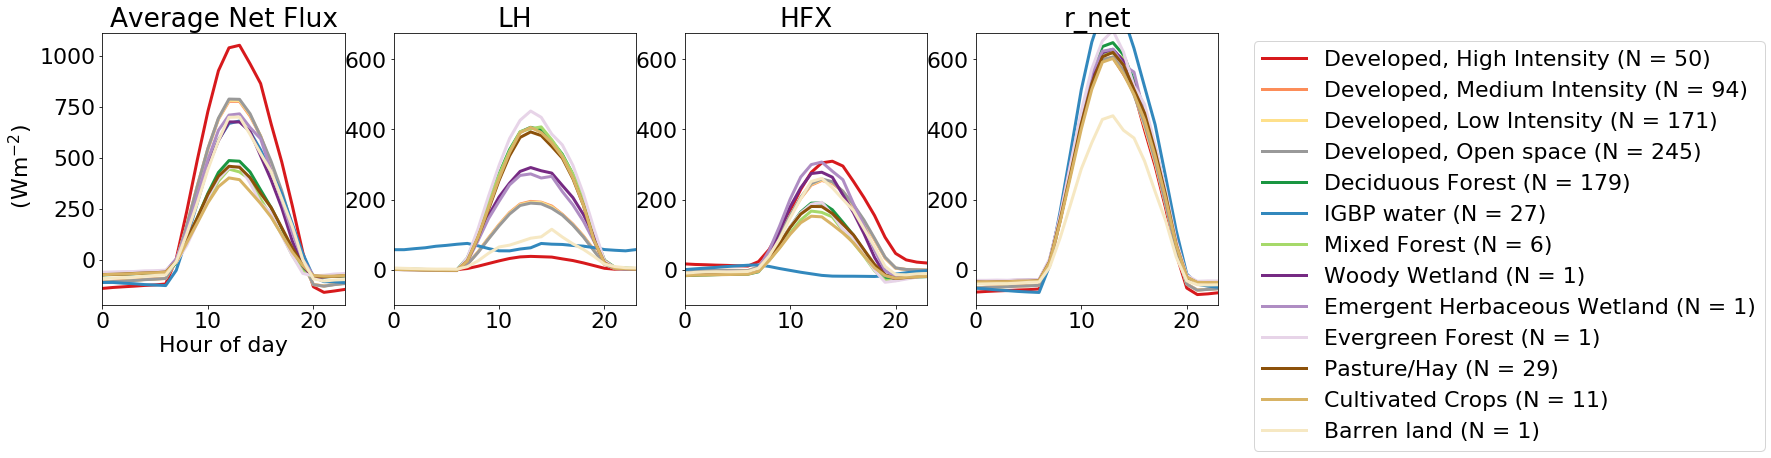

In [261]:
plt.figure(figsize = [20,5])
ax = plt.subplot(1, 4,1)
netflux = rnet -  model_allvars.loc[:,'LH']+ model_allvars.loc[:,'HFX'] -  model_allvars.loc[:,'GRDFLX']
for lc in lccs: #[ 26.,25,23,  28.]:
    if lc == 25: 
        netflux[lcc[(lcc.LCC <= 25) & (lcc.LCC >=24)].index].groupby(netflux.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1]) 
    else: 
        netflux[lcc[lcc.LCC==lc].index].groupby(netflux.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1]) 
#plt.legend(labels, bbox_to_anchor=(1.1, 1.01))
plt.title('Average Net Flux')
plt.xlabel('Hour of day')
plt.ylabel(' (Wm$^{-2}$)')
# want: 'R_net', 'Net LW','Sensible', 'Latent', 'Ground flux',
#selected_vars = ['GRDFLX','LH','HFX' ]
selected_vars = ['LH','HFX' ]
#['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX','CLDFRA', 'QVAPOR',]
#plt.figure(figsize=[20,5])
i = 2
for var in selected_vars:
    ax = plt.subplot(1, 4,i)
    data = model_allvars.loc[:,var]
    for lc in lccs: #[ 26.,25,23,  28.]:
        if lc == 25: 
            data[lcc[(lcc.LCC <= 25) & (lcc.LCC >=24)].index].groupby(data.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1]) 
        else: 
            data[lcc[lcc.LCC==lc].index].groupby(data.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1]) 
    ax.set_title(var)
    ax.set_ylim([-100,675])
    i = i+1
    
ax = plt.subplot(1, 4,i)
data = model_allvars.loc[:,var]
for lc in lccs: #[ 26.,25,23,  28.]:
    if lc == 25 : 
        rnet[lcc[(lcc.LCC <= 25) & (lcc.LCC >=24)].index].groupby(data.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1],ax=ax)
    else : 
        rnet[lcc[lcc.LCC==lc].index].groupby(data.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1],ax=ax)

ax.set_ylim([-100,675])
ax.set_title('r_net')
plt.legend(bbox_to_anchor=(1.1, 1.01))
plt.savefig(fig_fpath+'SEB_all_landtypes.eps', bbox_inches = 'tight')

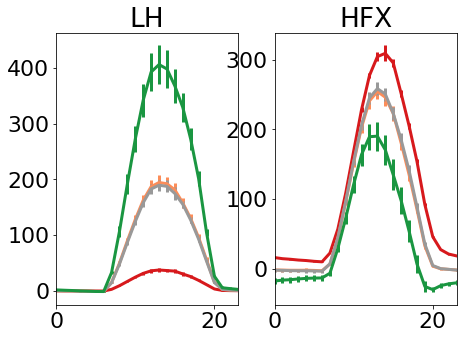

In [249]:
i = 2
plt.figure(figsize=[15,5])
for var in selected_vars:
    ax = plt.subplot(1, 4,i)
    data = model_allvars.loc[:,var]
    for lc in [ 26.,25,23,  28.]:
        if lc == 25: 
            data[lcc[(lcc.LCC <= 25) & (lcc.LCC >=24)].index].groupby(data.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1], 
                                                                                                                yerr = data[lcc[(lcc.LCC <= 25) & (lcc.LCC >=24)].index].groupby(data.index.hour).mean().std(axis=1)) 
        else: 
            data[lcc[lcc.LCC==lc].index].groupby(data.index.hour).mean().mean(axis=1).plot(label = lcc_english[lc] + ' (N = %i)'%model[lcc[lcc.LCC ==lc].index].shape[1], 
                                                                                          yerr =data[lcc[lcc.LCC==lc].index].groupby(data.index.hour).mean().std(axis=1) ) 
    ax.set_title(var)
    i = i+1


In [212]:
fig_fpath

'figures/whole_domain/'